**Include your code and answers in** `pair.py`.

### Random Forests with sklearn

In this sprint we will be practicing using the `scikit-learn` implementation of random forests. For this exercise, we'll be attempting to classify whether a customer churns or not given a set of inputs. We can use the Random Forest to get more insight into the churn data. Only about 15% of the data points are positive for churn. 

The documentation for sklearn's random forest can be found here: [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

You might find the documentation for these sklearn functions helpful: [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

1: Load the `data/churn.csv` file into a pandas DataFrame.

In [4]:
df = pd.read_csv('data/churn.csv')

In [6]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [11]:
# sns.pairplot(df) # It's sooooooo big

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


2: Convert the "no", "yes" values to booleans (True/False) as well as any booleans that are stored as strings.

In [13]:
df.select_dtypes(exclude=['int64','float64']).head()

,State,Phone,Int'l Plan,VMail Plan,Churn?
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


In [54]:
df_clean = df.replace({'Int\'l Plan': {'yes': True, 'no': False},
                       'VMail Plan': {'yes': True, 'no': False},
                       'Churn?': {'True.': True, 'False.': False}})

In [55]:
df_clean.select_dtypes(exclude=['int64','float64']).head()

,State,Phone,Int'l Plan,VMail Plan,Churn?
0,KS,382-4657,False,True,False
1,OH,371-7191,False,True,False
2,NJ,358-1921,False,False,False
3,OH,375-9999,True,False,False
4,OK,330-6626,True,False,False


3: Remove the features which aren't boolean or meaningfully numerical.

In [56]:
df_clean = df_clean.drop(['State', 'Phone', 'Area Code'], axis = 1)

4: Make a numpy array called `y` containing the churn values.

In [57]:
y = df_clean['Churn?'].values

In [58]:
type(y[0])

numpy.bool_

5: Make a 2 dimensional numpy array containing the feature data (everything except the labels) called `X`.

In [59]:
X = df_clean.drop(['Churn?'],axis=1).values

In [60]:
X

array([[128, False, True, ..., 3, 2.7, 1],
       [107, False, True, ..., 3, 3.7, 1],
       [137, False, False, ..., 5, 3.29, 0],
       ..., 
       [28, False, False, ..., 6, 3.81, 2],
       [184, True, False, ..., 10, 1.35, 2],
       [74, False, True, ..., 4, 3.7, 0]], dtype=object)

6: Use sklearn's `train_test_split` to split into train and test set.

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.33,
                                                    random_state=0)


7: Use sklearn's `RandomForestClassifier` to build a model of your data. Start by using the defaults for all of the parameters.

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [89]:
r2 = rf.score(X_test,y_test)
print(str(r2))

0.941818181818


8: What is the accuracy score on the test data?

In [71]:
mse = np.mean((y_test - y_pred)**2)
mse

/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  if __name__ == '__main__':


0.047272727272727272

9: Draw a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the results.

In [72]:
from sklearn.metrics import confusion_matrix

In [76]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[941   9]
 [ 43 107]]
0.956300813008


10: What are the precision and recall?

In [77]:
tp = conf_mat[0][0]
fn = conf_mat[1][0]
fp = conf_mat[0][1]
tn = conf_mat[1][1]

sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)


print('recall:', sensitivity)
print('precision:', precision)



recall: 0.956300813008
precision: 0.990526315789


11: Build the `RandomForestClassifier` again setting the out of bag parameter -- `oob_score` to be `True`. Compare the out of bag score of the *training* set with the accuracy on the *test* set. How close are they?

    It might complain that you are using too few trees to reliably use out of bag score. You can still see the results, but try increasing the number of trees as well to remove the warning.

In [92]:
rf2 = RandomForestClassifier(oob_score=True, random_state=0)
rf2.fit(X_train,y_train)
y_pred2 = rf2.predict(X_test)
rf2.score(X_test,y_test)

/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.94181818181818178

In [83]:
rf2.oob_score_

0.95297805642633227

12: Say you would like to give advice for what to focus on to prevent churn. You would like to be able to say what specifics about a user you should focus on changing in order to make them not churn. Use sklearn's model to get the feature importances. What are the top five features? What could you do to potentially limit churn?

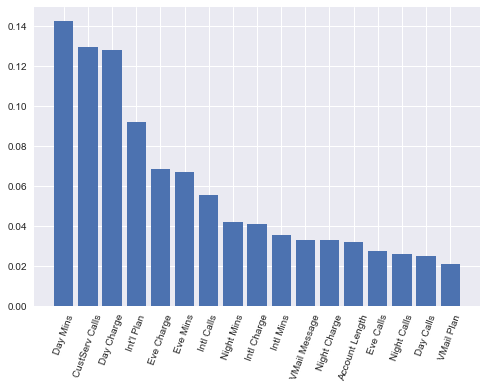

In [143]:
feats = df_clean.drop('Churn?', axis = 1).columns

importances = rf2.feature_importances_
indicies = np.argsort(importances)[::-1]

plt.bar(range(len(feats)), importances[indicies])
plt.xticks(range(len(feats)), feats[indicies], rotation=70)
plt.show()

In [151]:
[print(i) for i in feats[indicies][:5]]

Day Mins
CustServ Calls
Day Charge
Int'l Plan
Eve Charge


[None, None, None, None, None]

13: Try modifying the number of trees. The default is 10 trees. Try 5-10 different values for the number of trees and make a graph of the number of trees versus the accuracy score. Is there a point where creating more trees doesn't seem to help anymore?

    If you get an inconsistent graph, try creating a few random forests for each number and averaging them. This should smooth out your graph.

In [154]:
tree_numbers = [2,3,5,10,18, 69, 100, 169, 6969]

skorz = []
for tree_no in tree_numbers:
    rf = RandomForestClassifier(n_estimators= tree_no, random_state=0)
    skorz.append(rf.fit(X_train,y_train).score(X_test, y_test))

In [153]:
skorz

[0.94636363636363641,
 0.95818181818181813,
 0.95727272727272728,
 0.95999999999999996,
 0.95909090909090911]

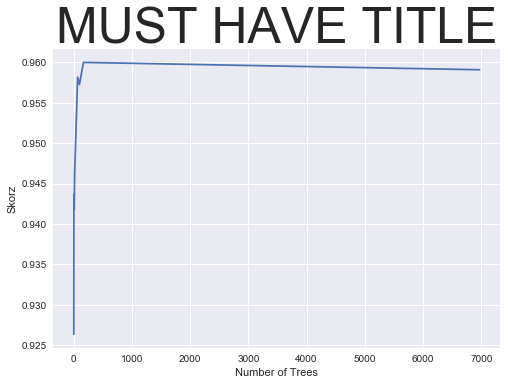

In [159]:
plt.plot(tree_numbers, skorz)
plt.xlabel('Number of Trees')
plt.ylabel('Skorz')
plt.title('MUST HAVE TITLE', size = 50)
plt.show()

14: Try modifying the max features parameter. The default is using `sqrt(total # of features)`. Try all the different possible values (1 to the total number of features) and make a graph of the number of features versus the accuracy score. Is there a point where using additional features doesn't seem to help?

In [173]:
def_siz = range(1,10)

skorz = []
for siz in def_siz:
    rf = RandomForestClassifier(max_features = siz, random_state=0)
    skorz.append(rf.fit(X_train,y_train).score(X_test, y_test))

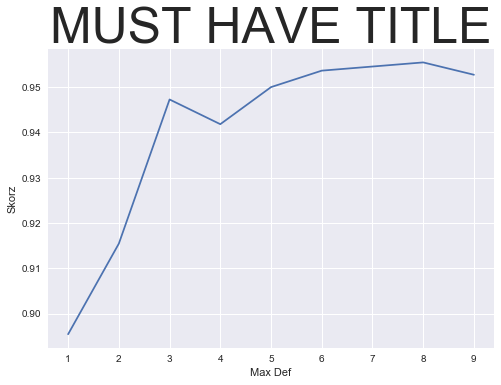

In [175]:
plt.plot(def_siz, skorz)
plt.xlabel('Max Def')
plt.ylabel('Skorz')
plt.title('MUST HAVE TITLE', size = 50)
plt.show()

15: Run all the other classifiers that we have learned so far in class (logistic regression, decision tree, k nearest neighbors) using sklearn's default parameters for all of them. You can use the optimal parameters you found above for Random Forest. If you have time, you can tune the other models as well. Which gets the highest accuracy? Precision? Recall?

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
lr_score = lr.fit(X_train,y_train).score(X_test,y_test)


knn = KNeighborsClassifier()
knn_score = knn.fit(X_train,y_train).score(X_test,y_test)



print(lr_score,knn_score,rf2.score(X_test,y_test))

0.871818181818 0.875454545455 0.941818181818


16: Use the included `plot_roc` function to visualize the roc curve of each model. Note that you can pass parameters like this:

        plot_roc(X, y, RandomForestClassifier, n_estimators=20)

    Which model would you choose if I'm okay with a recall of 0.2?

In [180]:
import sys
sys.path.append('/Users/gstudent/Downloads/dsi-random-forest-master/src/')


In [181]:
import roc

/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


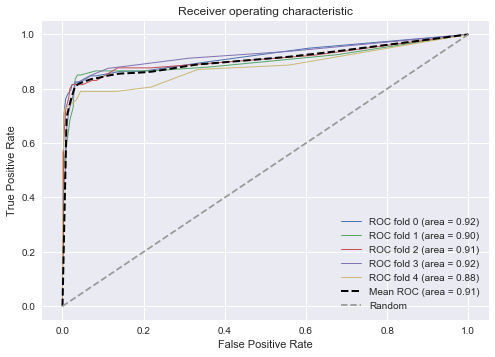

In [183]:
roc.plot_roc(X_train,y_train,RandomForestClassifier,n_estimators=20)

17: Plot the feature importances as described in the lecture notes. Recall that `RandomForestClassifier` is a ensemble of many trees, and each individual tree will attribute different importances to different features. Extend the feature importance code to find the standard deviation of the importance for each feature across all trees. Add error bars to your chart, where the width of the bars is the equal to the standard deviation for that feature.